In [59]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#You should use os.path.join() and include a Resources directory to hold the data for each assignment. 
#DO THIS ONCE YOU CREATE RESROUCES DIRECTORY WITH ASSIGNMENT
# File to Load (Remember to Change These) - CHANGE TO OS
# open(os.path.join("..", "Pymaceuticals", "data", "mouse_drug_data.csv")) as mycsvfile
# open(os.path.join("..", "Pymaceuticals", "data", "clinicaltrial_data.csv")) as mycsvfile
# path = os.path.join("..", "Resources", "mouse_drug_data.csv")
# path = os.path.join("..", "Resources", "clinicaltrial_data.csv")
# df = pd.read_csv(path)
#df.head

mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

mouse_drug_data.head()
clinical_trial_data.head()

# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug_data, clinical_trial_data, how='outer', on="Mouse ID")


# Display the data table for preview
combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [60]:

# Convert to DataFrame
# Preview DataFrame

Tumor_Volume = pd.DataFrame(combined_df, columns=["Drug", "Timepoint", "Tumor Volume (mm3)"])
Tumor_Volume.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713


In [61]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_grouped = Tumor_Volume.groupby(["Drug", "Timepoint"]).mean().reset_index()
mean_grouped.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [62]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_grouped = Tumor_Volume.groupby(["Drug", "Timepoint"]).sem()
standard_error_grouped
# Combine the data into a single dataset


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [63]:
standard_error_grouped.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [64]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
pivoted_mean= mean_grouped.pivot(index="Timepoint", columns="Drug")

pivoted_mean.head()

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint


# Combine the data into a single dataset


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [67]:
pivoted_mean.columns

MultiIndex([('Tumor Volume (mm3)', 'Capomulin'),
            ('Tumor Volume (mm3)',  'Ceftamin'),
            ('Tumor Volume (mm3)', 'Infubinol'),
            ('Tumor Volume (mm3)',  'Ketapril'),
            ('Tumor Volume (mm3)',  'Naftisol'),
            ('Tumor Volume (mm3)',   'Placebo'),
            ('Tumor Volume (mm3)',  'Propriva'),
            ('Tumor Volume (mm3)',  'Ramicane'),
            ('Tumor Volume (mm3)',  'Stelasyn'),
            ('Tumor Volume (mm3)', 'Zoniferol')],
           names=[None, 'Drug'])

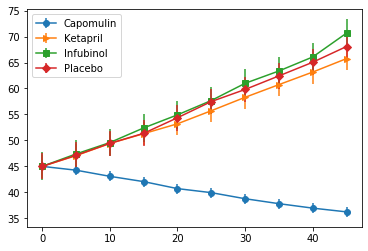

In [68]:
fig, ax = plt.subplots()
ax.errorbar(pivoted_mean.index, pivoted_mean[('Tumor Volume (mm3)', 'Capomulin')], marker='o', yerr=pivoted_mean[('Tumor Volume (mm3)', 'Capomulin')].sem())
ax.errorbar(pivoted_mean.index, pivoted_mean[('Tumor Volume (mm3)', 'Infubinol')], marker='>', yerr=pivoted_mean[('Tumor Volume (mm3)', 'Infubinol')].sem())
ax.errorbar(pivoted_mean.index, pivoted_mean[('Tumor Volume (mm3)', 'Ketapril')], marker='s', yerr=pivoted_mean[('Tumor Volume (mm3)', 'Ketapril')].sem())
ax.errorbar(pivoted_mean.index, pivoted_mean[('Tumor Volume (mm3)', 'Placebo')], marker='D', yerr=pivoted_mean[('Tumor Volume (mm3)', 'Placebo')].sem())
plt.legend(labels=['Capomulin', 'Ketapril', 'Infubinol', 'Placebo']);

In [13]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [87]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metastatic_mean = combined_df.drop("Tumor Volume (mm3)", 1).groupby(["Drug", "Timepoint"]).mean()
metastatic_mean.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [88]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

meta_standard_error = combined_df.drop(["Tumor Volume (mm3)", "Mouse ID"], 1).groupby(["Drug", "Timepoint"]).sem()
meta_standard_error.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [100]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_pivot = metastatic_mean.reset_index().pivot(index="Timepoint", columns="Drug")
metastatic_pivot

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [91]:
# Minor Data Munging to Re-Format the Data Frames

meta_standard_error.reset_index().pivot(index="Timepoint", columns="Drug")


# Preview that Reformatting worked


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   
25                0.181818  0.258831  0.265753  0.288275  0.185240  0.263888   
30                0.172944  0.249479  0.227823  0.347467  0.266667  0.300264   
35                0.169496  0.266526  0.224733  0.361418  0.330464  0.341412   
40                0.175610  0.289128  0.314466  0.315725  0.321702  0.297294   
45                0.202591  0.286101  0.309320  0.278722  0.351104  0.304240   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378  
25         0.199095  0.119430  0.219824  0.236621  
30         0.266469  0.139968  0.230641  0.248168  
35         0.366667  0.145997  0.240983  0.285714  
40         0.433903  0.160591  0.312815  0.299791  
45         0.428571  0.190221  0.359062  0.286400

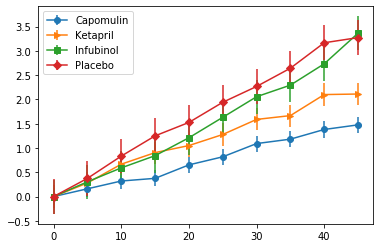

In [101]:
# Generate the Plot (with Error Bars)
fig2, ax2 = plt.subplots()
ax2.errorbar(metastatic_pivot.index, metastatic_pivot[('Metastatic Sites', 'Capomulin')], marker='o', yerr=metastatic_pivot[('Metastatic Sites', 'Capomulin')].sem())
ax2.errorbar(metastatic_pivot.index, metastatic_pivot[('Metastatic Sites', 'Infubinol')], marker='>', yerr=metastatic_pivot[('Metastatic Sites', 'Infubinol')].sem())
ax2.errorbar(metastatic_pivot.index, metastatic_pivot[('Metastatic Sites', 'Ketapril')], marker='s',  yerr=metastatic_pivot[('Metastatic Sites', 'Ketapril')].sem())
ax2.errorbar(metastatic_pivot.index, metastatic_pivot[('Metastatic Sites', 'Placebo')], marker='D',   yerr=metastatic_pivot[('Metastatic Sites', 'Placebo')].sem())
plt.legend(labels=['Capomulin', 'Ketapril', 'Infubinol', 'Placebo']);
# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [105]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_count = combined_df.drop(['Tumor Volume (mm3)', 'Metastatic Sites'], 1).groupby(["Drug", "Timepoint"]).count().reset_index().rename(columns={"Mouse ID": "Mouse Count"})
mice_count

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [50]:
# Minor Data Munging to Re-Format the Data Frames
mice_count.pivot(index="Timepoint", columns="Drug")
# Preview the Data Frame


Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

No handles with labels found to put in legend.


NameError: name 'plot' is not defined

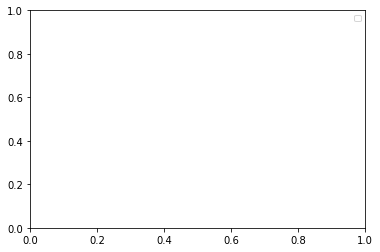

In [53]:
# Generate the Plot (Accounting for percentages)
#for loop??? to get to %
fig3, ax3 = plt.subplots()
ax.plot("Timepoint", )
ax.set_xlim(0, len("Timepoint"))
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plot.show()
# ax.errorbar(pivoted_mean.index, pivoted_mean[('Tumor Volume (mm3)', 'Capomulin')], marker='o', yerr=pivoted_mean[('Tumor Volume (mm3)', 'Capomulin')].sem())
# ax.errorbar(pivoted_mean.index, pivoted_mean[('Tumor Volume (mm3)', 'Infubinol')], marker='>', yerr=pivoted_mean[('Tumor Volume (mm3)', 'Infubinol')].sem())
# ax.errorbar(pivoted_mean.index, pivoted_mean[('Tumor Volume (mm3)', 'Ketapril')], marker='s', yerr=pivoted_mean[('Tumor Volume (mm3)', 'Ketapril')].sem())
# ax.errorbar(pivoted_mean.index, pivoted_mean[('Tumor Volume (mm3)', 'Placebo')], marker='D', yerr=pivoted_mean[('Tumor Volume (mm3)', 'Placebo')].sem())
plt.legend(labels=['Capomulin', 'Ketapril', 'Infubinol', 'Placebo']);
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [52]:
# Calculate the percent changes for each drug
pivoted_mean_pct = mean_grouped.reset_index().pivot(index="Timepoint", columns="Drug")
pivoted_mean_pct.loc[0] - pivoted_mean_pct.loc[1]
# Display the data to confirm


KeyError: 1

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)